<a href="https://colab.research.google.com/github/AlukweJonesTerah/A-simple-website/blob/main/textgeneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

In [ ]:

tokenizer = Tokenizer()

data = open('/tmp/irish-lyrics-eof.txt').read()
# print(data)

corpus = data.lower().split('\n')
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [ ]:
input_sequences = [ ]

for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

    # pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

    # Create predcitor and label
xs, labels = input_sequences[:,:-1], input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [ ]:
print(xs[6])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  2  3  5  8 10  7 11]


In [ ]:
print(ys,[6])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [6]


In [ ]:
print(xs[5])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  2  3  5  8 10  7]


In [ ]:
print(ys[5])

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
print(tokenizer.word_index)

{'is': 1, 'article': 2, 'link': 3, 'headline': 4, 'https': 5, 'sarcastic': 6, 'com': 7, 'www': 8, '0': 9, 'huffingtonpost': 10, 'entry': 11, 'to': 12, '1': 13, 'theonion': 14, 'us': 15, 'of': 16, 'the': 17, 'in': 18, 'html': 19, 'for': 20, 'a': 21, 'on': 22, 'b': 23, 'local': 24, 'with': 25, 'and': 26, 'trump': 27, 'new': 28, 'man': 29, 'n': 30, 'politics': 31, 'from': 32, 'at': 33, 'about': 34, 'by': 35, 'you': 36, 'up': 37, 'out': 38, 's': 39, 'how': 40, 'be': 41, 'after': 42, 'this': 43, 'entertainment': 44, 'not': 45, 'it': 46, 'that': 47, 'as': 48, 'what': 49, 'he': 50, 'report': 51, 'area': 52, 'your': 53, 'donald': 54, 'just': 55, 'are': 56, 'all': 57, 'has': 58, 'who': 59, 'his': 60, 'year': 61, 'one': 62, 'will': 63, 'more': 64, 'why': 65, 'woman': 66, 'into': 67, 'can': 68, 'have': 69, 'day': 70, 'obama': 71, 'first': 72, 'no': 73, 'over': 74, 'u': 75, 'old': 76, 'time': 77, 'i': 78, 'like': 79, 'clinton': 80, 'says': 81, 'off': 82, 'get': 83, 'life': 84, 'women': 85, 'now': 

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
# earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
# print(model.summary())
print(model)

Epoch 1/100
377/377 [==============================] - 34s 79ms/step - loss: 6.6454 - accuracy: 0.0704
Epoch 2/100
377/377 [==============================] - 30s 79ms/step - loss: 5.7667 - accuracy: 0.1115
Epoch 3/100
377/377 [==============================] - 31s 83ms/step - loss: 4.9399 - accuracy: 0.1598
Epoch 4/100
377/377 [==============================] - 30s 80ms/step - loss: 4.0618 - accuracy: 0.2309
Epoch 5/100
377/377 [==============================] - 30s 79ms/step - loss: 3.2154 - accuracy: 0.3256
Epoch 6/100
377/377 [==============================] - 31s 82ms/step - loss: 2.5797 - accuracy: 0.4242
Epoch 7/100
377/377 [==============================] - 30s 79ms/step - loss: 2.1321 - accuracy: 0.5096
Epoch 8/100
377/377 [==============================] - 29s 78ms/step - loss: 1.7172 - accuracy: 0.5957
Epoch 9/100
377/377 [==============================] - 34s 90ms/step - loss: 1.4488 - accuracy: 0.6494
Epoch 10/100
377/377 [==============================] - 30s 80ms/step - l

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

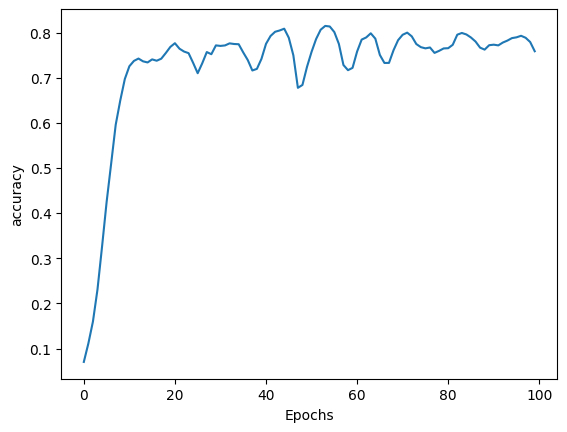

In [ ]:
plot_graphs(history, 'accuracy')

In [ ]:
seed_text = "I've got a bad feeling about this"
next_words = 100

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predicted = np.argmax(model.predict(token_list), axis=-1)
  output_word = " "
  for  word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word=word
      break
  seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 24ms/step
I've got a bad feeling about this to love again my sit and shut my eyes gone away gone my love gone away gone kilrush tis gone gone alas if ever to tree love so snow and your love your tags in your eyes they shook gone gone gone the sea gone your gone by love gone by the love your green love light high high rocky customer sends gone cross gone gone leaves gone morn by the in the place me in the remarkable belfast stream laughd into thayology gone battle i gone your green love gone away love kerrigan love gone by aisey your green
